In [32]:
import pandas as pd
from sklearn.metrics import r2_score

df0=pd.read_csv("pes-2019-all-players.csv")
df1=pd.read_csv("pes2019-all-players.v2.csv")

print("Are the values in columns equal?", df0['name'].equals(df1['name']))
print(df0.shape)

Are the values in columns equal? True
(12782, 117)


In [2]:
# Check for missing values in each column
missing_columns = df0.columns[df0.isnull().any()].tolist()

# Filter the DataFrame to show only the columns with missing values
missing_values_df = df0[missing_columns]

# Display the columns with missing values and their corresponding counts of null values
missing_values_counts = missing_values_df.isnull().sum()
print("Columns with Missing Values:")
for col, count in missing_values_counts.items():
    print(f"{col}: {count} null values")


Columns with Missing Values:
LWF: 1489 null values
SS: 1489 null values
CF: 1489 null values
RWF: 1489 null values


In [3]:
# Categorical columns
cat_col = [col for col in df0.columns if df0[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df0.columns if df0[col].dtype != 'object']
print('Numerical columns :',num_col)
for x in cat_col:
    print(x," =",df0[x].nunique())

Categorical columns : ['name', 'shirt_number', 'team_name', 'league', 'nationality', 'region', 'foot', 'condition', 'registered_position', 'playing_style']
Numerical columns : ['height', 'weight', 'age', 'LWF', 'SS', 'CF', 'RWF', 'LMF', 'DMF', 'CMF', 'AMF', 'RMF', 'LB', 'CB', 'RB', 'attacking_prowess', 'ball_control', 'dribbling', 'low_pass', 'lofted_pass', 'finishing', 'place_kicking', 'swerve', 'header', 'defensive_prowess', 'ball_winning', 'kicking_power', 'speed', 'explosive_power', 'unwavering_balance', 'physical_contact', 'jump', 'goalkeeping', 'gk_catch', 'clearing', 'reflexes', 'coverage', 'stamina', 'weak_foot_usage', 'weak_foot_accuracy', 'form', 'injury_resistance', 'overall_rating', 'rating_as_GK', 'rating_as_CB', 'rating_as_LB', 'rating_as_RB', 'rating_as_DMF', 'rating_as_CMF', 'rating_as_LMF', 'rating_as_RMF', 'rating_as_AMF', 'rating_as_LWF', 'rating_as_RWF', 'rating_as_SS', 'rating_as_CF', 'skill_malicia', 'skill_cross_over_turn', 'skill_early_cross', 'skill_first_time_

In [4]:
df0= df0.fillna({'LWF': 0, 'SS': 0,"CF": 0,"RWF": 0})

In [5]:
toDrop=["shirt_number", "team_name", "league", "nationality","region", "condition"]
df0=df0.drop(columns=toDrop)
df0.to_csv("new.csv", index=False)

In [6]:
#df is your DataFrame containing the dataset
df=pd.read_csv("new.csv")
rating_columns = [col for col in df.columns if col.startswith('rating')]

# Drop the columns
df = df.drop(columns=rating_columns)

# Print the DataFrame to confirm the columns are dropped
print(df.head())
df.to_csv("new.csv", index=False)

           name  height  weight  age        foot registered_position  LWF  \
0    C. RONALDO     185      80   33  Right foot                 LWF  2.0   
1      L. MESSI     170      72   31   Left foot                  SS  1.0   
2        NEYMAR     175      68   26  Right foot                 LWF  2.0   
3     L. MODRIĆ     174      65   33  Right foot                 CMF  0.0   
4  DAVID DE GEA     192      76   28  Right foot                  GK  0.0   

    SS   CF  RWF  ...  skill_knuckle_shot  skill_no_look_pass  \
0  2.0  2.0  2.0  ...                   1                   1   
1  2.0  2.0  2.0  ...                   0                   0   
2  2.0  1.0  1.0  ...                   0                   1   
3  0.0  0.0  0.0  ...                   0                   0   
4  0.0  0.0  0.0  ...                   0                   0   

   skill_super_sub  com_playing_style_trickster  com_playing_style_mazing_run  \
0                0                            1                  

In [7]:
df["registered_position"]

0        LWF
1         SS
2        LWF
3        CMF
4         GK
        ... 
12777    CMF
12778     GK
12779    CMF
12780    CMF
12781    CMF
Name: registered_position, Length: 12782, dtype: object

In [8]:
df=pd.read_csv("new.csv")
df=df.drop(columns="registered_position")
df.to_csv("new.csv", index=False)
df["overall_rating"]=df1["overall_rating"]
print(df["overall_rating"])

0        94
1        94
2        94
3        91
4        91
         ..
12777    49
12778    49
12779    48
12780    47
12781    46
Name: overall_rating, Length: 12782, dtype: int64


In [9]:
# Specify the columns to one-hot encode
columns_to_encode = ['playing_style', 'foot']

# Apply one-hot encoding using pd.get_dummies
df = pd.get_dummies(df, columns=columns_to_encode)

# Save the modified DataFrame to a new CSV file
df.to_csv("new.csv", index=False)


In [10]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('new.csv')

# Identify numerical columns (excluding 'object' type columns)
numerical_columns = df.select_dtypes(include='number').columns.tolist()

# Initialize MinMaxScaler with feature range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply MinMaxScaler to numerical columns and replace values in the DataFrame
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Save the modified DataFrame back to the same CSV file
df.to_csv("new.csv", index=False)

# Optionally, display the first few rows of the modified DataFrame
print(df.head())


/home/jaafar/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


           name    height    weight       age  LWF   SS   CF  RWF  LMF  DMF  \
0    C. RONALDO  0.625000  0.535211  0.600000  1.0  1.0  1.0  1.0  1.0  0.0   
1      L. MESSI  0.312500  0.422535  0.533333  0.5  1.0  1.0  1.0  0.5  0.0   
2        NEYMAR  0.416667  0.366197  0.366667  1.0  1.0  0.5  0.5  1.0  0.0   
3     L. MODRIĆ  0.395833  0.323944  0.600000  0.0  0.0  0.0  0.0  1.0  0.5   
4  DAVID DE GEA  0.770833  0.478873  0.433333  0.0  0.0  0.0  0.0  0.0  0.0   

   ...  playing_style_Hole Player  playing_style_Offensive Full-back  \
0  ...                        0.0                                0.0   
1  ...                        0.0                                0.0   
2  ...                        0.0                                0.0   
3  ...                        0.0                                0.0   
4  ...                        0.0                                0.0   

   playing_style_Offensive Goalkeeper  playing_style_Orchestrator  \
0                      

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load your dataset
data = pd.read_csv("new.csv")

# Select all numeric columns except the target variable (overall_rating)
X = data.select_dtypes(include='number').drop(columns=['overall_rating'])
y = data['overall_rating']

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert X back to DataFrame for consistency
X_df = pd.DataFrame(X, columns=data.select_dtypes(include='number').drop(columns=['overall_rating']).columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# Define a list of regression models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    model.fit(X_train, y_train)  # Fit the model on the training data
    y_pred = model.predict(X_test)  # Make predictions on the testing data
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    print(f"Mean Absolute Error (MAE) for {name}: {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {name}: {rmse:.2f}")
    print("-" * 40)


Training and evaluating Linear Regression...
Mean Absolute Error (MAE) for Linear Regression: 0.03
Root Mean Squared Error (RMSE) for Linear Regression: 0.04
----------------------------------------
Training and evaluating Random Forest Regressor...
Mean Absolute Error (MAE) for Random Forest Regressor: 0.02
Root Mean Squared Error (RMSE) for Random Forest Regressor: 0.03
----------------------------------------
Training and evaluating Gradient Boosting Regressor...
Mean Absolute Error (MAE) for Gradient Boosting Regressor: 0.02
Root Mean Squared Error (RMSE) for Gradient Boosting Regressor: 0.03
----------------------------------------
Training and evaluating Support Vector Regressor...
Mean Absolute Error (MAE) for Support Vector Regressor: 0.04
Root Mean Squared Error (RMSE) for Support Vector Regressor: 0.05
----------------------------------------


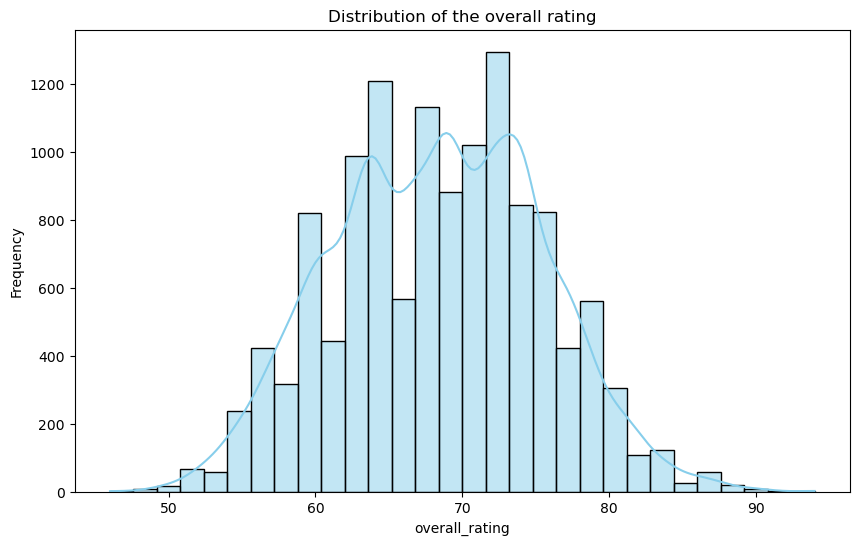

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df0['overall_rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of the overall rating')
plt.xlabel('overall_rating')
plt.ylabel('Frequency')
plt.show()


Top correlated variables with overall_rating:
overall_rating      1.000000
low_pass            0.647088
lofted_pass         0.635884
kicking_power       0.633185
ball_control        0.614041
stamina             0.612032
form                0.494456
dribbling           0.489021
age                 0.485943
physical_contact    0.429645
Name: overall_rating, dtype: float64


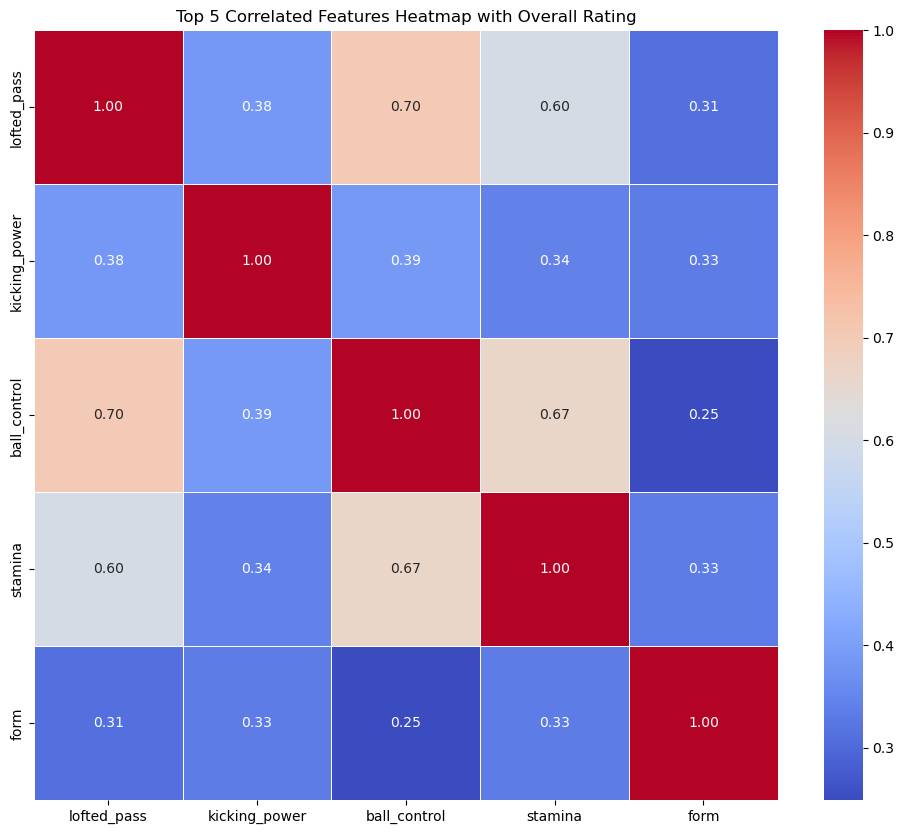

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Get the correlations with overall_rating
correlations = corr_matrix['overall_rating'].sort_values(ascending=False)

# Print top correlated variables with overall_rating
print("Top correlated variables with overall_rating:")
print(correlations.head(10))

# Get the top 5 correlated feature pairs
top_corr_feature_pairs = corr_matrix.abs()['overall_rating'].sort_values(ascending=False).drop('overall_rating')[1:6]

# Extract the top 5 correlated features from the correlation matrix
top_corr_features = top_corr_feature_pairs.index.tolist()

# Plot the heatmap for top 5 correlated features
top_correlation_matrix = df[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Top 5 Correlated Features Heatmap with Overall Rating')
plt.show()


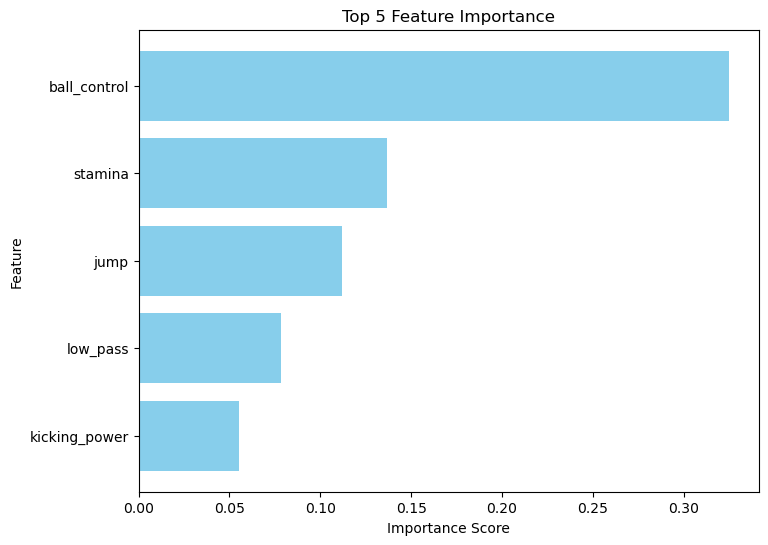

In [29]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Separate features (X) and target variable (y)
X = df.drop(columns=['overall_rating'])
y = df['overall_rating']

X=X.drop(columns=['name'])
# Initialize the Random Forest Regressor model
model = RandomForestRegressor()

# Fit the model to your data
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select only the top 5 most important features
top_5_features = feature_importance_df.head(5)

# Plot feature importance for the top 5 features
plt.figure(figsize=(8, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


In [ ]:
# Initialize dictionaries to store training and testing evaluation metrics for each model
train_scores = {'MAE': [], 'RMSE': [], 'R-squared': []}
test_scores = {'MAE': [], 'RMSE': [], 'R-squared': []}

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    model.fit(X_train, y_train)  # Fit the model on the training data
    
    # Evaluate on training data
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_r2 = r2_score(y_train, y_train_pred)
    train_scores['MAE'].append(train_mae)
    train_scores['RMSE'].append(train_rmse)
    train_scores['R-squared'].append(train_r2)
    
    # Evaluate on testing data
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_r2 = r2_score(y_test, y_test_pred)
    test_scores['MAE'].append(test_mae)
    test_scores['RMSE'].append(test_rmse)
    test_scores['R-squared'].append(test_r2)
    
    print(f"Training MAE for {name}: {train_mae:.2f}")
    print(f"Testing MAE for {name}: {test_mae:.2f}")
    print(f"Training RMSE for {name}: {train_rmse:.2f}")
    print(f"Testing RMSE for {name}: {test_rmse:.2f}")
    print(f"Training R-squared for {name}: {train_r2:.2f}")
    print(f"Testing R-squared for {name}: {test_r2:.2f}")
    print("-" * 40)

# Plot training and testing MAE
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(models)) - 0.15, train_scores['MAE'], width=0.3, label='Training MAE')
plt.bar(np.arange(len(models)) + 0.15, test_scores['MAE'], width=0.3, label='Testing MAE')
plt.xticks(np.arange(len(models)), list(models.keys()), rotation=45)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Plot training and testing RMSE
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(models)) - 0.15, train_scores['RMSE'], width=0.3, label='Training RMSE')
plt.bar(np.arange(len(models)) + 0.15, test_scores['RMSE'], width=0.3, label='Testing RMSE')
plt.xticks(np.arange(len(models)), list(models.keys()), rotation=45)
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Plot training and testing R-squared
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(models)) - 0.15, train_scores['R-squared'], width=0.3, label='Training R-squared')
plt.bar(np.arange(len(models)) + 0.15, test_scores['R-squared'], width=0.3, label='Testing R-squared')
plt.xticks(np.arange(len(models)), list(models.keys()), rotation=45)
plt.title('R-squared (R^2) Comparison')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.legend()
plt.show()


Training and evaluating Linear Regression...
Training MAE for Linear Regression: 0.03
Testing MAE for Linear Regression: 0.03
Training RMSE for Linear Regression: 0.04
Testing RMSE for Linear Regression: 0.04
Training R-squared for Linear Regression: 0.93
Testing R-squared for Linear Regression: 0.93
----------------------------------------
Training and evaluating Random Forest Regressor...
